| **Inicio** | **atrás 21** | **Siguiente 23** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./21_Coeficiente_de_Correlacion_de_Kendall_Tau-b.ipynb)| [⏩](./23_Exploratorio_de_Series_de_Tiempo.ipynb)|

# **22. Predice el Futuro y Conoce qué es el Pronóstico de Series de Tiempo: Una Introducción con Python**

## **Introducción**

El pronóstico de series de tiempo es una técnica utilizada para predecir valores futuros de una variable a lo largo del tiempo, basándose en su comportamiento histórico. Es especialmente útil en situaciones donde los datos tienen una estructura temporal y se busca anticipar patrones, tendencias y fluctuaciones en el futuro. En Python, puedes utilizar la biblioteca `statsmodels` para realizar pronósticos de series de tiempo. A continuación, te brindo una explicación detallada junto con un ejemplo y gráficas correspondientes.

**Paso 1: Importar las bibliotecas necesarias:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing

**Paso 2: Cargar y explorar los datos:**

Supongamos que tenemos un conjunto de datos de ventas mensuales de un producto en los últimos años. A continuación se muestra un ejemplo simplificado de estos datos:

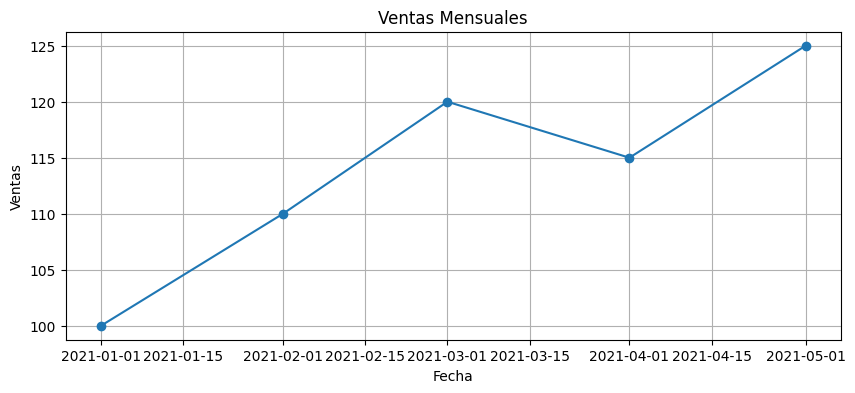

In [4]:
data = {'Fecha': ['2021-01', '2021-02', '2021-03', '2021-04', '2021-05'],
        'Ventas': [100, 110, 120, 115, 125]}

df = pd.DataFrame(data)
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.set_index('Fecha', inplace=True)

df.index.freq = 'MS'  # Establecer la frecuencia como mensual (start of the month)

plt.figure(figsize=(10, 4))
plt.plot(df.index, df['Ventas'], marker='o')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Ventas Mensuales')
plt.grid(True)
plt.show()

**Paso 3: Aplicar el modelo de suavizado exponencial simple:**

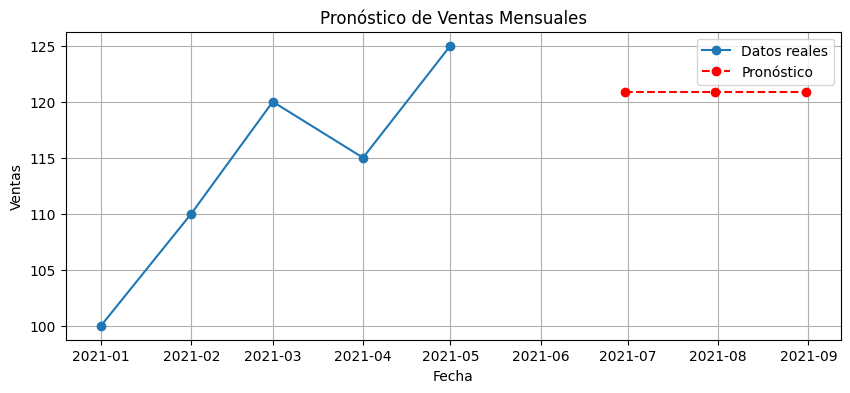

In [5]:
model = SimpleExpSmoothing(df['Ventas'])
model_fit = model.fit(smoothing_level=0.6, optimized=False)
forecast = model_fit.forecast(steps=3)  # Pronóstico de los próximos 3 meses

plt.figure(figsize=(10, 4))
plt.plot(df.index, df['Ventas'], marker='o', label='Datos reales')
plt.plot(pd.date_range(start=df.index[-1], periods=4, freq='M')[1:], forecast, marker='o', color='r', linestyle='dashed', label='Pronóstico')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Pronóstico de Ventas Mensuales')
plt.legend()
plt.grid(True)
plt.show()

**Explicación:**

- En el paso 2, hemos creado un DataFrame `df` con datos ficticios de ventas mensuales y lo hemos visualizado utilizando un gráfico de líneas.
- En el paso 3, hemos aplicado el modelo de suavizado exponencial simple utilizando la función `SimpleExpSmoothing` de `statsmodels`. Luego, hemos ajustado el modelo con los datos reales y calculado un pronóstico de las ventas para los próximos 3 meses.
- Finalmente, hemos graficado los datos reales junto con el pronóstico para visualizar cómo se compara el pronóstico con los valores reales.

El resultado será un gráfico que muestra los datos reales de ventas mensuales y el pronóstico para los próximos meses. El suavizado exponencial simple es solo uno de los muchos enfoques para el pronóstico de series de tiempo. Puedes explorar otros modelos más avanzados, como el ARIMA (AutoRegressive Integrated Moving Average), para abordar patrones más complejos en los datos de series de tiempo.

## **Qué es un Pronóstico**

Un pronóstico, en el contexto del análisis de datos y la estadística, es una estimación o predicción de eventos o valores futuros basada en información histórica o datos pasados. El objetivo principal de realizar un pronóstico es anticipar cómo se comportarán ciertas variables en el futuro para tomar decisiones informadas. Los pronósticos son utilizados en una amplia variedad de campos, como la economía, la meteorología, el marketing, la planificación de la cadena de suministro y muchos otros.

En el análisis de series de tiempo, que es una técnica específica para manejar datos temporales, se realizan pronósticos para prever valores futuros de una variable a lo largo del tiempo. Estos valores pronosticados se basan en patrones, tendencias y comportamientos observados en los datos históricos.

Los pronósticos pueden ser útiles para tomar decisiones informadas, planificar estrategias y asignar recursos de manera más eficiente. Sin embargo, es importante comprender que los pronósticos no son predicciones infalibles del futuro. Siempre existe cierto grado de incertidumbre y riesgo asociado con cualquier pronóstico, ya que los eventos futuros pueden verse afectados por factores imprevistos.

En resumen, un pronóstico es una herramienta valiosa para anticipar el comportamiento futuro de variables basándose en datos pasados y patrones históricos, y puede ser utilizado para mejorar la toma de decisiones en diversas áreas.

## **Pronósticos con Intervalos de Confianza**

Los pronósticos con intervalos de confianza son una forma de proporcionar una medida de incertidumbre en las estimaciones de pronóstico. En lugar de simplemente proporcionar un valor único como pronóstico, se proporciona un rango o intervalo dentro del cual se espera que caiga el valor futuro con cierto nivel de confianza. Esto es particularmente útil porque reconoce que los pronósticos no son siempre precisos y permite a los tomadores de decisiones comprender la variabilidad y la incertidumbre asociadas con las predicciones.

**Ejemplo:**

Supongamos que estamos pronosticando las ventas de un producto para el próximo trimestre. En lugar de proporcionar un solo valor como pronóstico, queremos proporcionar un intervalo de confianza del 95%. Esto significa que estamos 95% seguros de que las ventas reales caerán dentro de este intervalo.

**Paso 1: Importar las bibliotecas necesarias:**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing

**Paso 2: Cargar y explorar los datos:**

Usaremos los mismos datos de ventas mensuales que se utilizaron en el ejemplo anterior.

In [7]:
data = {'Fecha': ['2021-01', '2021-02', '2021-03', '2021-04', '2021-05'],
        'Ventas': [100, 110, 120, 115, 125]}

df = pd.DataFrame(data)
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.set_index('Fecha', inplace=True)

**Paso 3: Aplicar el modelo de suavizado exponencial simple:**

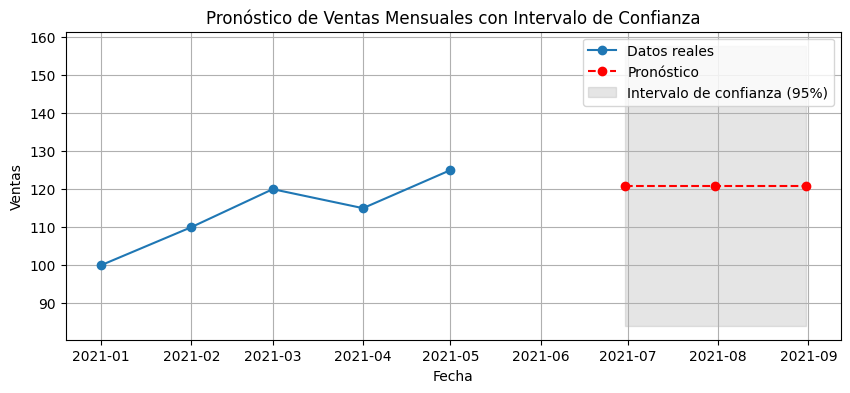

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing
from scipy.stats import t

data = {'Fecha': ['2021-01', '2021-02', '2021-03', '2021-04', '2021-05'],
        'Ventas': [100, 110, 120, 115, 125]}

df = pd.DataFrame(data)
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.set_index('Fecha', inplace=True)
df.index.freq = 'MS'  # Establecer la frecuencia como inicio del mes (Monthly Start)

# Aplicar el modelo de suavizado exponencial simple
model = SimpleExpSmoothing(df['Ventas'])
model_fit = model.fit(smoothing_level=0.6, optimized=False)
forecast = model_fit.forecast(steps=3)  # Pronóstico de los próximos 3 meses

# Calcular el error estándar del pronóstico
stderr = np.sqrt(np.sum((model_fit.resid ** 2)) / (len(df) - 2))

# Calcular el valor crítico de la distribución t-Student para un intervalo de confianza del 95%
alpha = 0.05
df_degrees_freedom = len(df) - 2
t_critical = t.ppf(1 - alpha / 2, df_degrees_freedom)

# Calcular los límites del intervalo de confianza
conf_int_lower = forecast - t_critical * stderr
conf_int_upper = forecast + t_critical * stderr

# Graficar los datos reales, el pronóstico y el intervalo de confianza
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['Ventas'], marker='o', label='Datos reales')
plt.plot(pd.date_range(start=df.index[-1], periods=4, freq='M')[1:], forecast, marker='o', color='r', linestyle='dashed', label='Pronóstico')
plt.fill_between(pd.date_range(start=df.index[-1], periods=4, freq='M')[1:], conf_int_lower, conf_int_upper, color='gray', alpha=0.2, label='Intervalo de confianza (95%)')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Pronóstico de Ventas Mensuales con Intervalo de Confianza')
plt.legend()
plt.grid(True)
plt.show()

**Explicación:**

- En el paso 3, además del pronóstico, estamos calculando los errores estándar (stderr) y los límites del intervalo de confianza utilizando la función `forecast`. El parámetro `alpha` se establece en 0.05 para obtener un intervalo de confianza del 95%.
- Luego, hemos utilizado `fill_between` para sombrear el área entre los límites del intervalo de confianza en el gráfico.

El resultado será un gráfico que muestra los datos reales de ventas mensuales, el pronóstico y el intervalo de confianza del 95%. Este intervalo de confianza proporciona una medida de incertidumbre en el pronóstico y ayuda a los tomadores de decisiones a comprender la variabilidad esperada en los valores futuros.

## **Tendencias en Series de Tiempo**

En el análisis de series de tiempo, la tendencia se refiere a la dirección general en la que los datos están evolucionando a lo largo del tiempo. Representa el comportamiento a largo plazo y muestra si los valores están aumentando, disminuyendo o manteniéndose relativamente estables a medida que pasa el tiempo. Identificar la tendencia en los datos es esencial para comprender cómo se están comportando y para realizar pronósticos más precisos.

Existen tres tipos principales de tendencias en series de tiempo:

1. **Tendencia Ascendente (Upward Trend):** En este caso, los valores de la serie de tiempo tienden a aumentar a medida que avanza el tiempo. Puede indicar un crecimiento constante o una tendencia alcista en la variable que se está analizando.

2. **Tendencia Descendente (Downward Trend):** Aquí, los valores de la serie de tiempo disminuyen a medida que avanza el tiempo. Puede reflejar una disminución constante o una tendencia bajista en la variable.

3. **Tendencia Horizontal (Horizontal or Flat Trend):** En este escenario, los valores de la serie de tiempo no muestran una clara tendencia al alza o a la baja, sino que permanecen en un rango relativamente constante.

**Ejemplo:**

Supongamos que estamos analizando los datos de ventas mensuales de un producto en los últimos años. Vamos a generar datos ficticios para ilustrar cada tipo de tendencia:

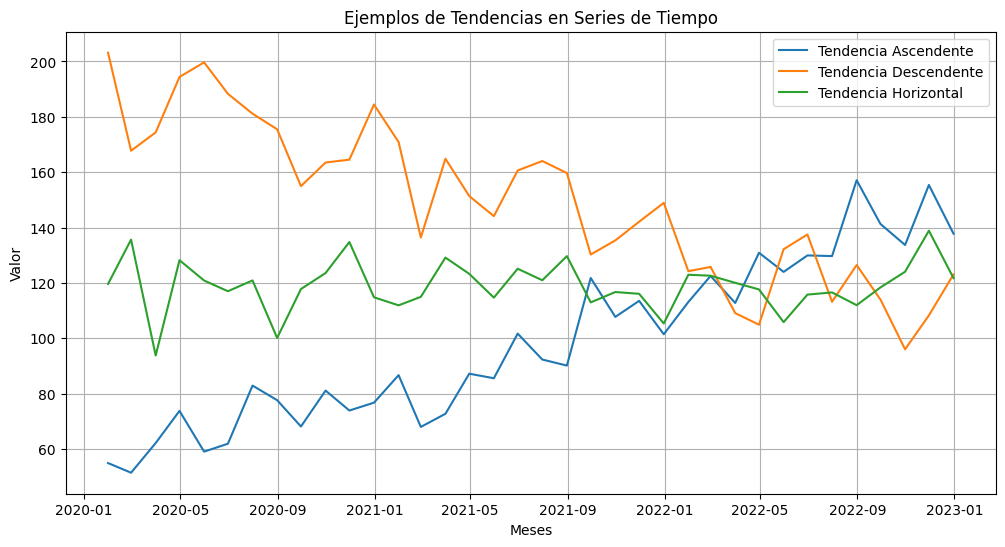

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Crear datos ficticios con tendencias
np.random.seed(42)
n = 36  # Número de meses
meses = pd.date_range(start='2020-01', periods=n, freq='M')
tendencia_ascendente = np.linspace(50, 150, n) + np.random.normal(0, 10, n)
tendencia_descendente = np.linspace(200, 100, n) + np.random.normal(0, 15, n)
tendencia_horizontal = np.random.normal(120, 10, n)

# Crear un DataFrame
data = {'Meses': meses, 'Tendencia Ascendente': tendencia_ascendente, 'Tendencia Descendente': tendencia_descendente, 'Tendencia Horizontal': tendencia_horizontal}
df = pd.DataFrame(data)
df.set_index('Meses', inplace=True)

# Graficar las tendencias
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Tendencia Ascendente'], label='Tendencia Ascendente')
plt.plot(df.index, df['Tendencia Descendente'], label='Tendencia Descendente')
plt.plot(df.index, df['Tendencia Horizontal'], label='Tendencia Horizontal')
plt.xlabel('Meses')
plt.ylabel('Valor')
plt.title('Ejemplos de Tendencias en Series de Tiempo')
plt.legend()
plt.grid(True)
plt.show()

En este ejemplo, hemos creado tres series de tiempo ficticias con diferentes tipos de tendencias. Las gráficas muestran claramente cómo evolucionan los valores a lo largo del tiempo en cada caso.

Identificar la tendencia en una serie de tiempo es fundamental para comprender su comportamiento y tomar decisiones informadas. Puedes utilizar técnicas de análisis de series de tiempo, como suavizado exponencial, regresión lineal u otros métodos, para modelar y extraer la tendencia subyacente en los datos.

## **Estacionalidad en Series de Tiempo**

La estacionalidad en series de tiempo se refiere a patrones regulares o repetitivos que ocurren en un intervalo de tiempo fijo, como un día, una semana, un mes o un año. Estos patrones se repiten de manera predecible en cada período y pueden ser causados por factores estacionales, climáticos, festivos o económicos. Identificar la estacionalidad es crucial para comprender cómo ciertos factores influyen en los datos a lo largo del tiempo y para ajustar los pronósticos en consecuencia.

Existen dos tipos principales de estacionalidad en series de tiempo:

1. **Estacionalidad Aditiva:** En este caso, las fluctuaciones estacionales tienen una magnitud constante a lo largo del tiempo. Si se suma la componente estacional a los valores observados, se obtiene una serie de tiempo más estable. Esto ocurre cuando las fluctuaciones estacionales no están relacionadas con el nivel de la serie.

2. **Estacionalidad Multiplicativa:** En este escenario, las fluctuaciones estacionales aumentan o disminuyen proporcionalmente al nivel de la serie de tiempo. Si se multiplica la componente estacional por los valores observados, se obtiene una serie de tiempo más estable. Esto ocurre cuando las fluctuaciones estacionales están relacionadas con el nivel de la serie.

**Ejemplo:**

Supongamos que estamos analizando los datos de ventas mensuales de helados en una tienda a lo largo de varios años. Dado que las ventas de helados suelen aumentar en los meses más cálidos y disminuir en los meses más fríos, podemos esperar una estacionalidad en la serie de tiempo.

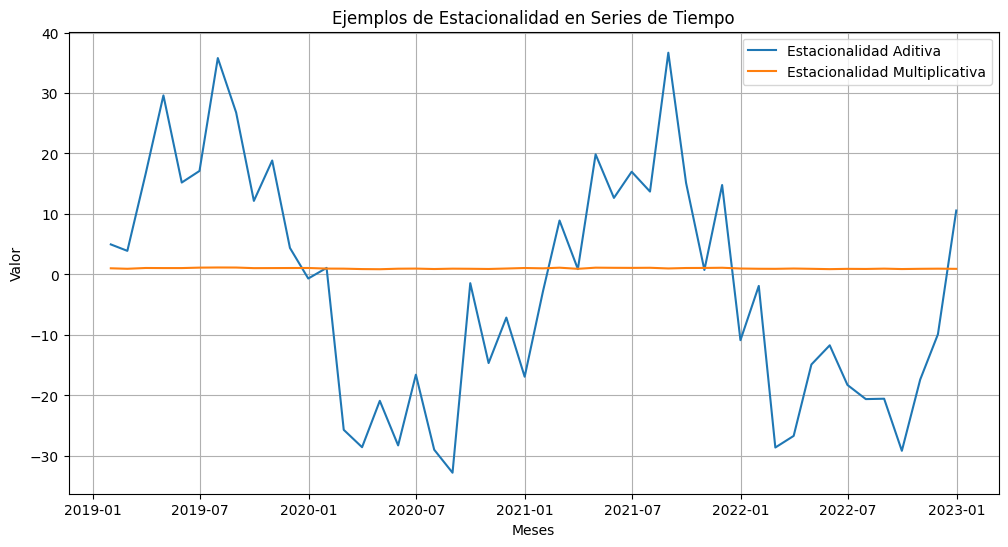

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Crear datos ficticios con estacionalidad
np.random.seed(42)
n = 48  # Número de meses
meses = pd.date_range(start='2019-01', periods=n, freq='M')
estacionalidad_aditiva = np.sin(np.linspace(0, 4 * np.pi, n)) * 20 + np.random.normal(0, 10, n)
estacionalidad_multiplicativa = np.sin(np.linspace(0, 4 * np.pi, n)) * 0.1 + 1 + np.random.normal(0, 0.05, n)

# Crear un DataFrame
data = {'Meses': meses, 'Estacionalidad Aditiva': estacionalidad_aditiva, 'Estacionalidad Multiplicativa': estacionalidad_multiplicativa}
df = pd.DataFrame(data)
df.set_index('Meses', inplace=True)

# Graficar las estacionalidades
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Estacionalidad Aditiva'], label='Estacionalidad Aditiva')
plt.plot(df.index, df['Estacionalidad Multiplicativa'], label='Estacionalidad Multiplicativa')
plt.xlabel('Meses')
plt.ylabel('Valor')
plt.title('Ejemplos de Estacionalidad en Series de Tiempo')
plt.legend()
plt.grid(True)
plt.show()

En este ejemplo, hemos creado dos series de tiempo ficticias con diferentes tipos de estacionalidad. La primera serie muestra una estacionalidad aditiva, donde la amplitud de las fluctuaciones estacionales es constante en el tiempo. La segunda serie muestra una estacionalidad multiplicativa, donde la amplitud de las fluctuaciones estacionales aumenta proporcionalmente al nivel de la serie.

Identificar la estacionalidad en una serie de tiempo es esencial para realizar ajustes adecuados en los pronósticos y comprender cómo los patrones repetitivos afectan los datos a lo largo del tiempo.

## **Patrones Cíclicos en Series de Tiempo**

Los patrones cíclicos en series de tiempo se refieren a fluctuaciones que no son ni estacionales ni aleatorias, sino que siguen un patrón en forma de onda o ciclo que se repite a lo largo del tiempo. A diferencia de la estacionalidad, los patrones cíclicos no tienen una periodicidad fija y pueden tener duraciones variables. Estos patrones están relacionados con factores económicos, sociales o políticos que influyen en los datos de manera recurrente pero no predecible.

Identificar los patrones cíclicos en una serie de tiempo es importante para comprender cómo factores a largo plazo pueden afectar las tendencias observadas y cómo estos patrones pueden influir en los pronósticos.

**Ejemplo:**

Supongamos que estamos analizando los datos de la economía de un país a lo largo de varias décadas. Los ciclos económicos, que incluyen fases de crecimiento y recesión, son ejemplos de patrones cíclicos. Generemos datos ficticios para ilustrar este concepto:

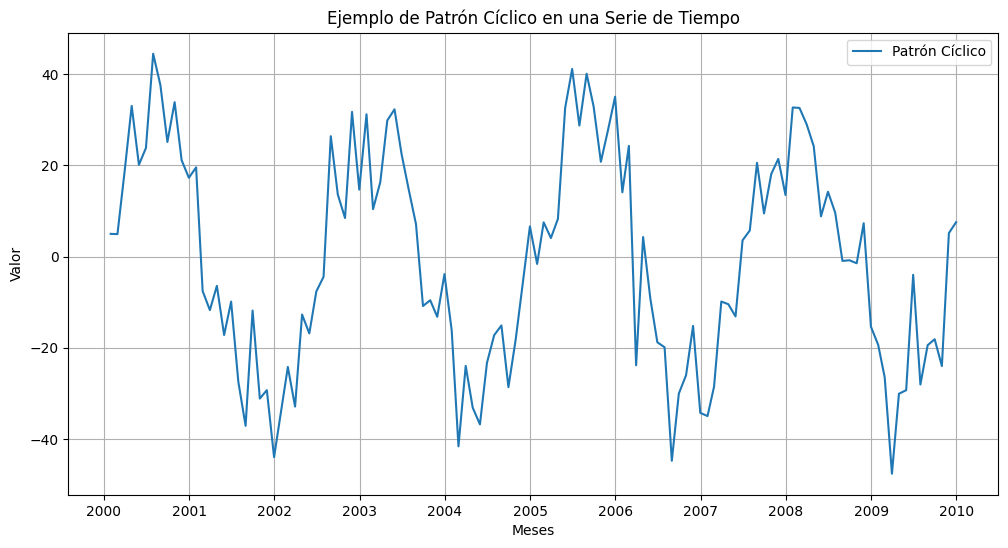

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Crear datos ficticios con patrón cíclico
np.random.seed(42)
n = 120  # Número de meses
meses = pd.date_range(start='2000-01', periods=n, freq='M')
patron_ciclico = np.sin(np.linspace(0, 8 * np.pi, n)) * 30 + np.random.normal(0, 10, n)

# Crear un DataFrame
data = {'Meses': meses, 'Patrón Cíclico': patron_ciclico}
df = pd.DataFrame(data)
df.set_index('Meses', inplace=True)

# Graficar el patrón cíclico
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Patrón Cíclico'], label='Patrón Cíclico')
plt.xlabel('Meses')
plt.ylabel('Valor')
plt.title('Ejemplo de Patrón Cíclico en una Serie de Tiempo')
plt.legend()
plt.grid(True)
plt.show()

En este ejemplo, hemos creado una serie de tiempo ficticia con un patrón cíclico. La gráfica muestra cómo los valores siguen un patrón de onda que se repite aproximadamente cada cuatro años. Estos patrones cíclicos pueden estar relacionados con factores económicos, políticos u otros factores que influyen en los datos a lo largo de períodos de tiempo más largos que los patrones estacionales.

Identificar los patrones cíclicos puede ser desafiante debido a su naturaleza irregular y no predecible. Sin embargo, reconocer su presencia es importante para comprender la influencia de factores de largo plazo en los datos y para realizar pronósticos más precisos.

## **Modelos y técnicas de pronóstico**

Los modelos y técnicas de pronóstico son herramientas utilizadas en la planificación y toma de decisiones empresariales para prever futuros valores de variables o eventos basados en datos históricos y patrones observados. Estos pronósticos son cruciales para una amplia gama de industrias, como la economía, la meteorología, la logística y el marketing, ya que permiten tomar medidas proactivas y estratégicas.

Existen varias técnicas y modelos de pronóstico, cada uno con sus propias características y aplicaciones. A continuación, te proporcionaré una explicación detallada de algunas de las técnicas más comunes junto con ejemplos y gráficas para ilustrar cada una de ellas.

1. **Método de Media Móvil:**
   Este método implica calcular el promedio de un cierto número de observaciones pasadas para predecir el valor futuro. Puede ser una media móvil simple (SMA) o una media móvil ponderada (WMA) en la que las observaciones recientes tienen un peso mayor.

   **Ejemplo:**
   Supongamos que estamos pronosticando las ventas mensuales de un producto. Utilizaremos una media móvil de 3 meses para predecir las ventas del próximo mes.

   **Gráfica:**
   Aquí, la línea azul representa las ventas reales, mientras que la línea naranja representa la media móvil de 3 meses.

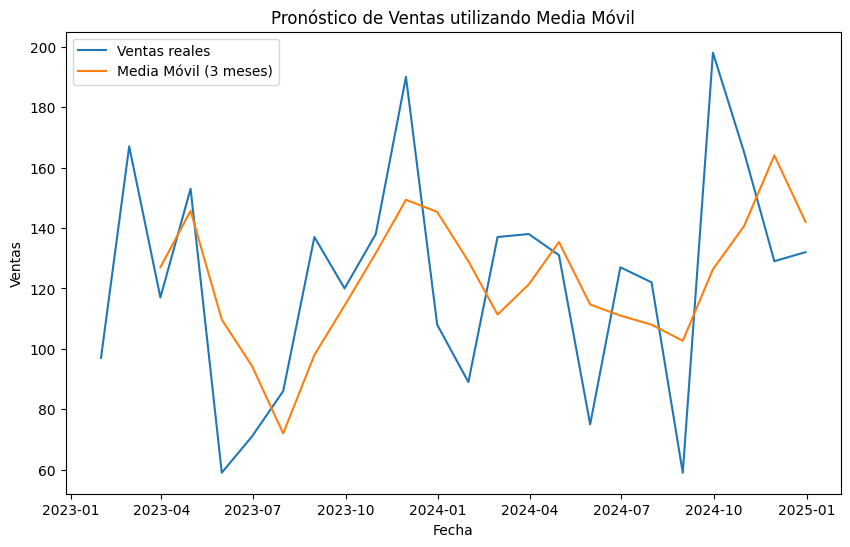

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Crear datos de ejemplo
np.random.seed(0)
dates = pd.date_range(start='2023-01-01', periods=24, freq='M')
sales = np.random.randint(50, 200, size=24)

# Crear DataFrame
data = pd.DataFrame({'Date': dates, 'Sales': sales})
data.set_index('Date', inplace=True)

# Calcular la media móvil de 3 meses
data['SMA_3'] = data['Sales'].rolling(window=3).mean()

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(data['Sales'], label='Ventas reales')
plt.plot(data['SMA_3'], label='Media Móvil (3 meses)')
plt.legend()
plt.title('Pronóstico de Ventas utilizando Media Móvil')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.show()

2. **Método de Suavización Exponencial:**
   Este método asigna pesos exponenciales decrecientes a las observaciones pasadas, lo que da más importancia a los datos más recientes. Hay varios niveles de suavización según el valor del factor de suavización.

   **Ejemplo:**
   Usando el mismo escenario de ventas mensuales, aplicamos el suavizado exponencial con un factor de suavización del 0.3.

   **Gráfica:**
   En esta gráfica, la línea azul representa las ventas reales, mientras que la línea naranja muestra las ventas pronosticadas mediante el método de suavización exponencial.

/home/puma/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/home/puma/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


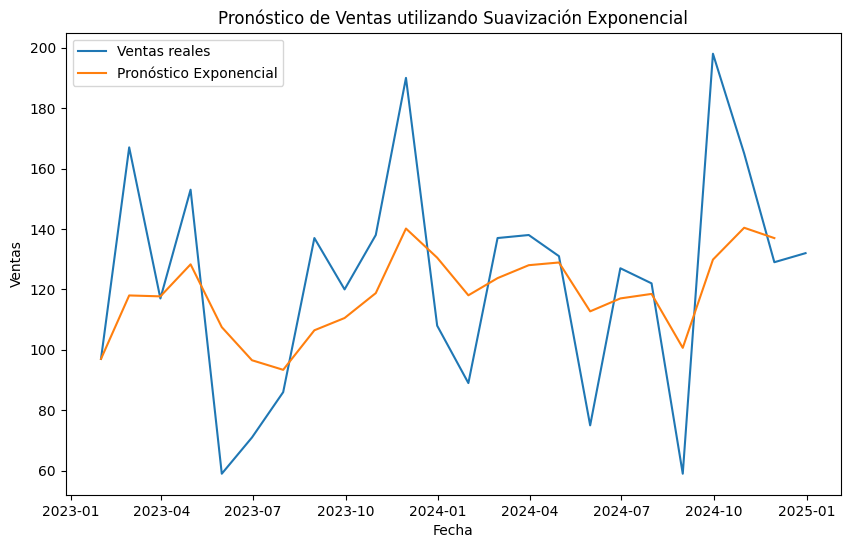

In [4]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Crear modelo de suavización exponencial
model = SimpleExpSmoothing(data['Sales'])
fit = model.fit(smoothing_level=0.3)

# Pronosticar usando el modelo
data['Exponential_Forecast'] = fit.fittedvalues.shift(-1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(data['Sales'], label='Ventas reales')
plt.plot(data['Exponential_Forecast'], label='Pronóstico Exponencial')
plt.legend()
plt.title('Pronóstico de Ventas utilizando Suavización Exponencial')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.show()

 3. **Modelo de Regresión Lineal:**

   La regresión lineal busca establecer una relación lineal entre una variable dependiente y una o más variables independientes. Se puede usar para prever valores futuros basados en tendencias históricas.

   **Ejemplo:**
   Si deseamos pronosticar el crecimiento anual de los ingresos de una empresa en función de los años anteriores, podríamos usar un modelo de regresión lineal.

   **Gráfica:**
   Aquí, los puntos azules representan los ingresos reales a lo largo de los años, y la línea roja es la línea de regresión lineal que modela la tendencia.

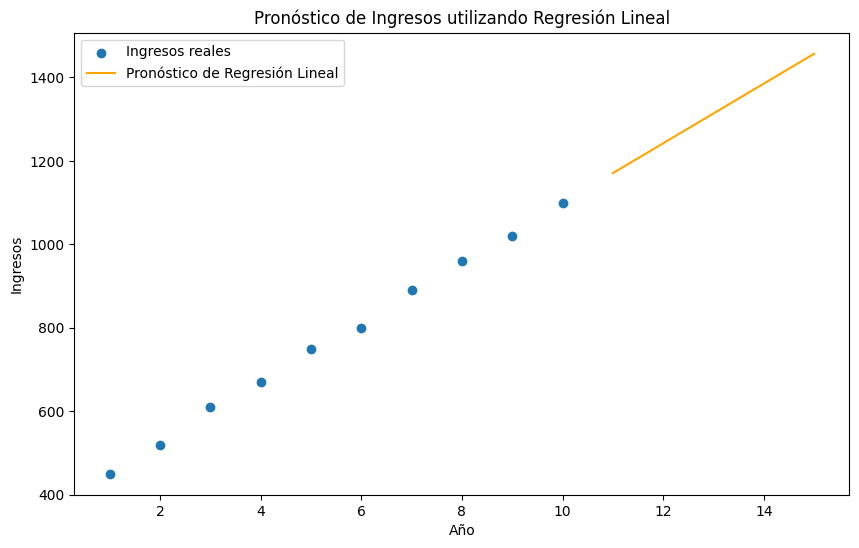

In [5]:
from sklearn.linear_model import LinearRegression

# Crear datos de ejemplo
years = np.arange(1, 11).reshape(-1, 1)
revenue = np.array([450, 520, 610, 670, 750, 800, 890, 960, 1020, 1100])

# Crear modelo de regresión lineal
reg_model = LinearRegression()
reg_model.fit(years, revenue)

# Pronosticar usando el modelo
future_years = np.arange(11, 16).reshape(-1, 1)
forecasted_revenue = reg_model.predict(future_years)

# Graficar
plt.figure(figsize=(10, 6))
plt.scatter(years, revenue, label='Ingresos reales')
plt.plot(future_years, forecasted_revenue, label='Pronóstico de Regresión Lineal', color='orange')
plt.legend()
plt.title('Pronóstico de Ingresos utilizando Regresión Lineal')
plt.xlabel('Año')
plt.ylabel('Ingresos')
plt.show()

  Estos son solo ejemplos de algunas técnicas de pronóstico. Es importante seleccionar la técnica adecuada según la naturaleza de los datos y los objetivos del pronóstico. Cada técnica tiene sus ventajas y desventajas, y puede ser necesario realizar ajustes o combinaciones para obtener resultados más precisos.

## **Librerías de Python para Series de Tiempo**

¡Por supuesto! Las series de tiempo son conjuntos de datos que se recopilan o registran en intervalos de tiempo regulares, como días, meses o años. Analizar y pronosticar series de tiempo es fundamental en diversas disciplinas, como economía, finanzas, meteorología y más. Hay varias bibliotecas en Python que facilitan el análisis y la manipulación de series de tiempo. Algunas de las bibliotecas más populares son: Pandas, NumPy y Matplotlib.

Voy a proporcionarte ejemplos utilizando estas bibliotecas para cargar, visualizar y analizar series de tiempo. Emplearé un conjunto de datos simple para demostrar cada paso.

Asegúrate de tener las bibliotecas instaladas utilizando el siguiente código:

**Ejemplo:**

Supongamos que tenemos datos de ventas mensuales durante un año y queremos analizar y visualizar la serie de tiempo.

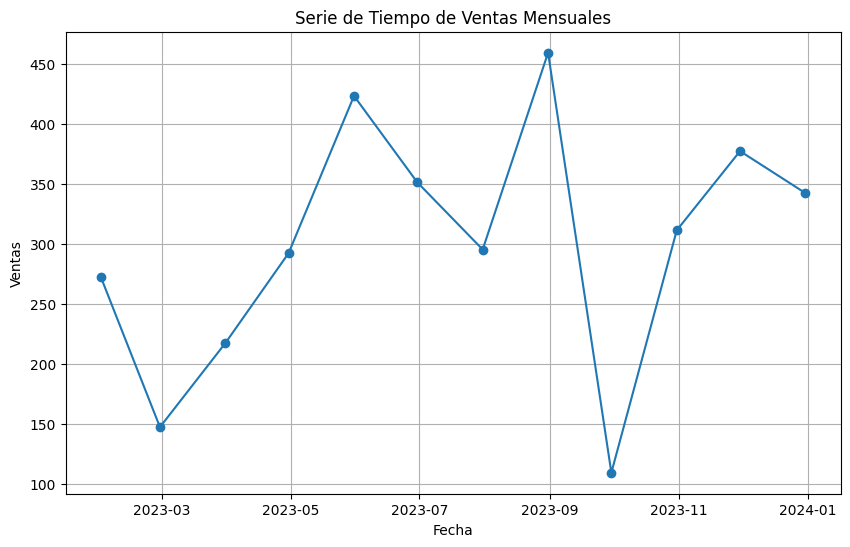

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Crear datos de ejemplo
np.random.seed(0)
dates = pd.date_range(start='2023-01-01', periods=12, freq='M')
sales = np.random.randint(100, 500, size=12)

# Crear un DataFrame de Pandas
data = pd.DataFrame({'Date': dates, 'Sales': sales})
data.set_index('Date', inplace=True)

# Visualizar la serie de tiempo
plt.figure(figsize=(10, 6))
plt.plot(data['Sales'], marker='o')
plt.title('Serie de Tiempo de Ventas Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()

En este ejemplo, hemos utilizado Pandas para crear un DataFrame con fechas y ventas mensuales. Luego, utilizamos Matplotlib para trazar la serie de tiempo de ventas.

Recuerda que este es un ejemplo básico. Para análisis y pronósticos más avanzados, puedes utilizar bibliotecas adicionales como `statsmodels` y `scikit-learn`.

Por ejemplo, aquí hay un ejemplo de ajuste de un modelo ARIMA (AutoRegressive Integrated Moving Average) utilizando `statsmodels`:

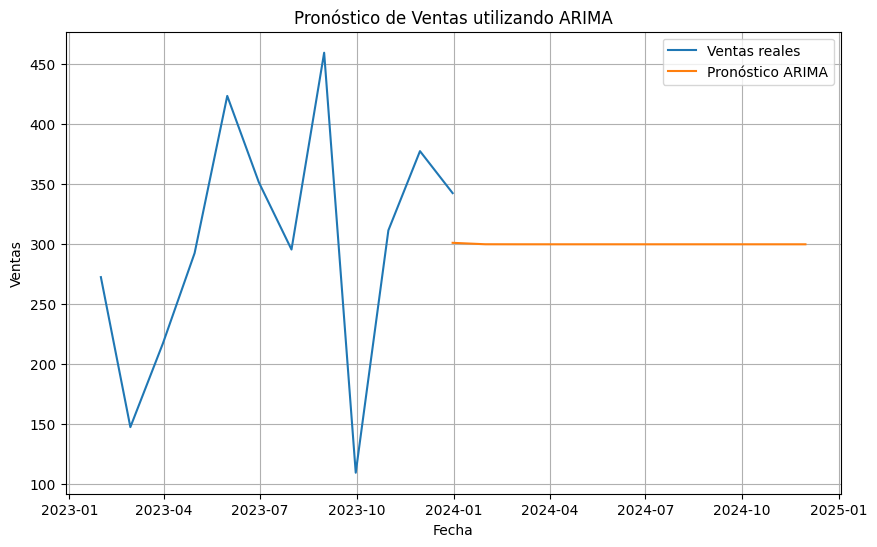

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Crear datos de ejemplo
np.random.seed(0)
dates = pd.date_range(start='2023-01-01', periods=12, freq='M')
sales = np.random.randint(100, 500, size=12)

# Crear un DataFrame de Pandas
data = pd.DataFrame({'Date': dates, 'Sales': sales})
data.set_index('Date', inplace=True)
data.index.freq = 'M'  # Establecer la frecuencia mensual

# Ajustar un modelo ARIMA
model = ARIMA(data['Sales'], order=(1, 1, 1))
model_fit = model.fit()

# Pronosticar valores futuros
forecast = model_fit.forecast(steps=12)

# Visualizar pronóstico
plt.figure(figsize=(10, 6))
plt.plot(data['Sales'], label='Ventas reales')
plt.plot(pd.date_range(start='2023-12-01', periods=12, freq='M'), forecast, label='Pronóstico ARIMA')
plt.legend()
plt.title('Pronóstico de Ventas utilizando ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()

Este ejemplo muestra cómo usar `statsmodels` para ajustar un modelo ARIMA a los datos de ventas y pronosticar valores futuros. También se incluye un intervalo de confianza para el pronóstico.

Estas son solo algunas de las capacidades de las bibliotecas en Python para trabajar con series de tiempo. Dependiendo de tus necesidades y el nivel de análisis requerido, puedes explorar más funciones y técnicas disponibles en estas bibliotecas.

| **Inicio** | **atrás 21** | **Siguiente 23** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./21_Coeficiente_de_Correlacion_de_Kendall_Tau-b.ipynb)| [⏩](./23_Exploratorio_de_Series_de_Tiempo.ipynb)|